# Visualize attention Map

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


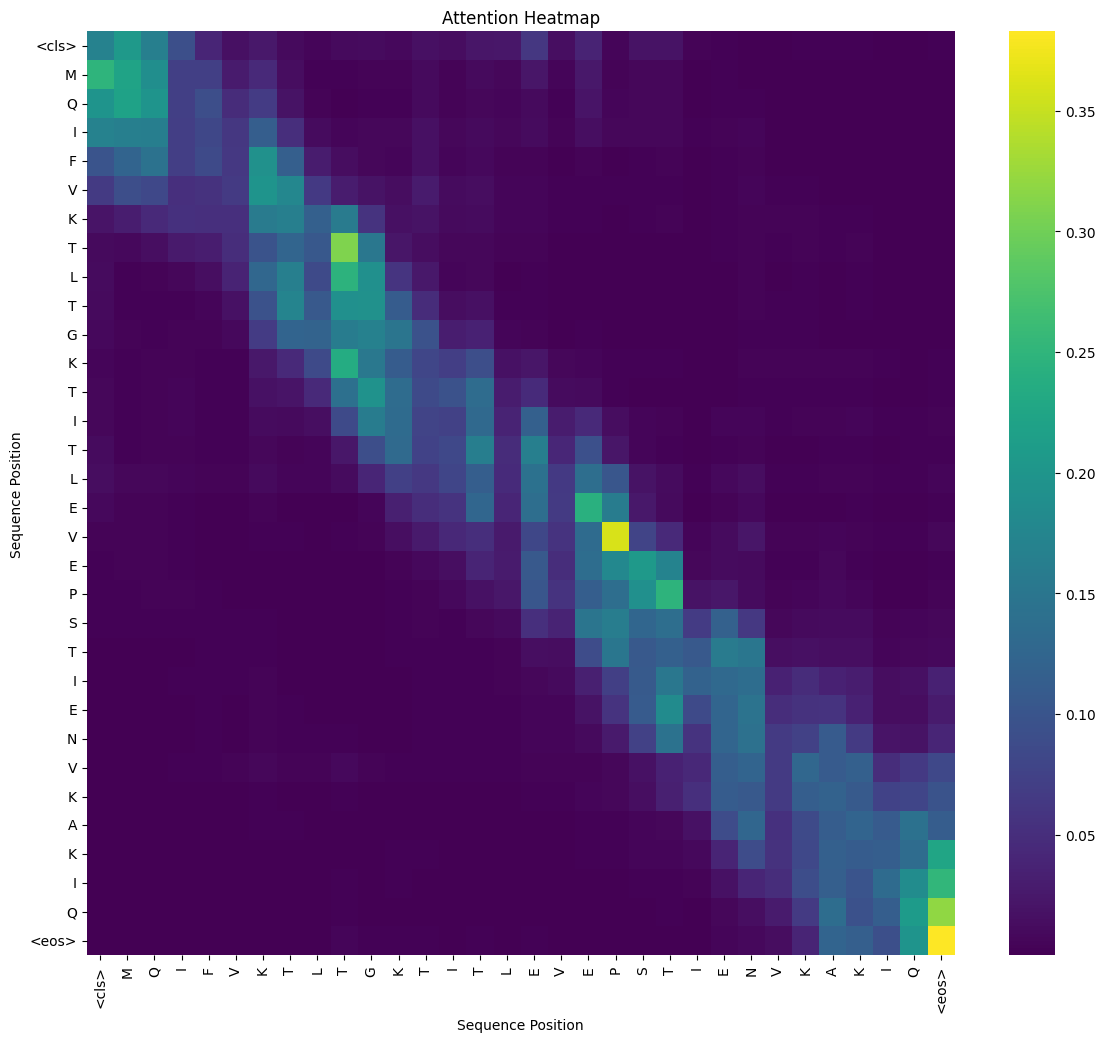

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import AutoTokenizer, EsmModel

# Load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("facebook/esm2_t6_8M_UR50D")
model = EsmModel.from_pretrained("facebook/esm2_t6_8M_UR50D")

# Input protein sequence
prot = 'MQIFVKTLTGKTITLEVEPSTIENVKAKIQ'
tokenized = tokenizer(prot, return_tensors='pt')

# Get model output
out = model(**tokenized, output_attentions=True)

# Extract attention weights from the first layer and the first head
att = out.attentions
layer_index = 5  # Choose the layer index you want to visualize
head_index = 6  # Choose the head index you want to visualize
attention_weights = att[layer_index][0][head_index].detach().numpy()

# Get the token labels
tokens = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])

# Plot heatmap of attention weights
plt.figure(figsize=(14, 12))
ax = sns.heatmap(attention_weights, cmap='viridis', xticklabels=tokens, yticklabels=tokens)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Attention Heatmap')
ax.set_xlabel('Sequence Position')
ax.set_ylabel('Sequence Position')
plt.show()


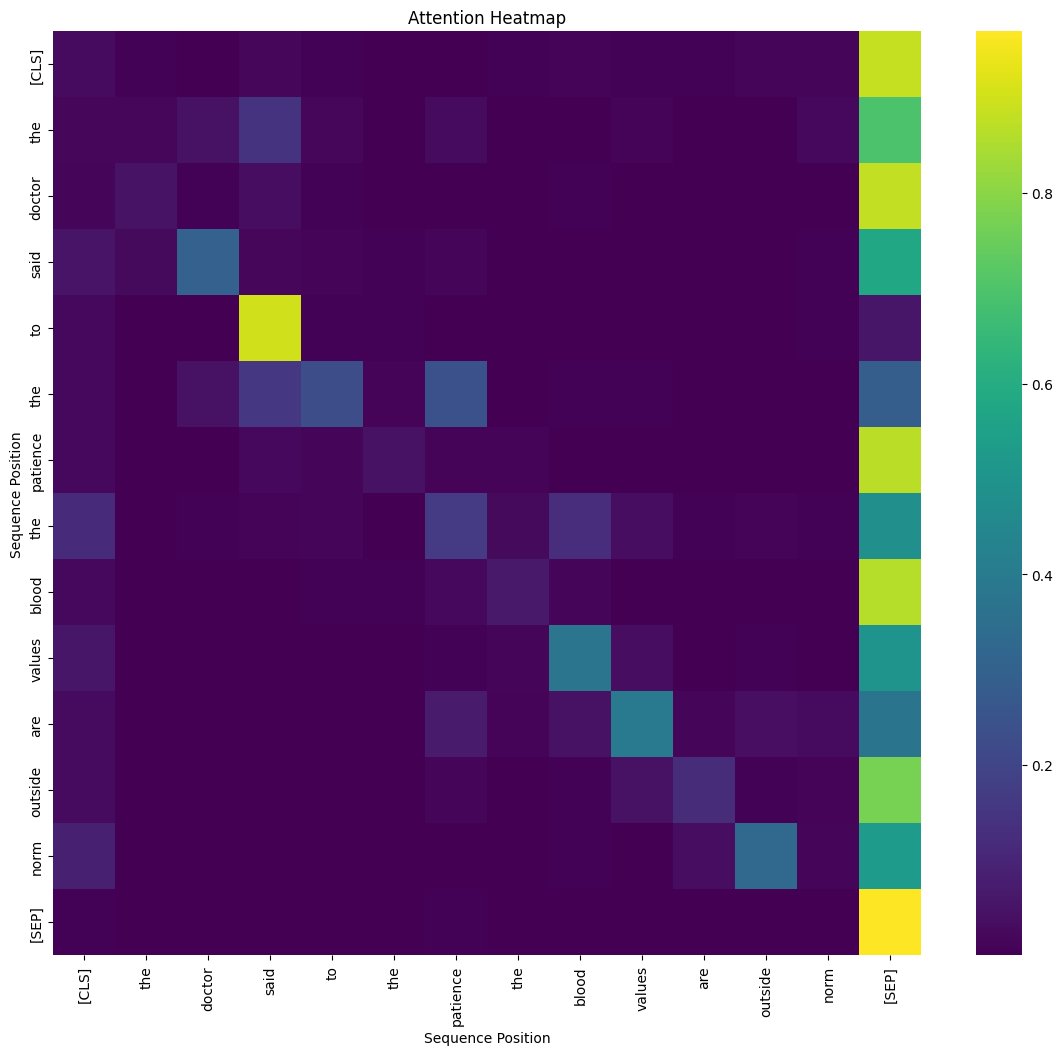

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import BertTokenizer, BertModel

# Load model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)

# Input sentence
sentence = "The doctor said to the patience the blood values are outside norm"
tokenized = tokenizer(sentence, return_tensors='pt')

# Get model output
with torch.no_grad():
    out = model(**tokenized)

# Extract attention weights from the first layer and the first head
att = out.attentions
layer_index = 4  # Choose the layer index you want to visualize
head_index =  7 # Choose the head index you want to visualize
attention_weights = att[layer_index][0][head_index].detach().numpy()

# Get the token labels
tokens = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])

# Plot heatmap of attention weights
plt.figure(figsize=(14, 12))
ax = sns.heatmap(attention_weights, cmap='viridis', xticklabels=tokens, yticklabels=tokens)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Attention Heatmap')
ax.set_xlabel('Sequence Position')
ax.set_ylabel('Sequence Position')
plt.show()



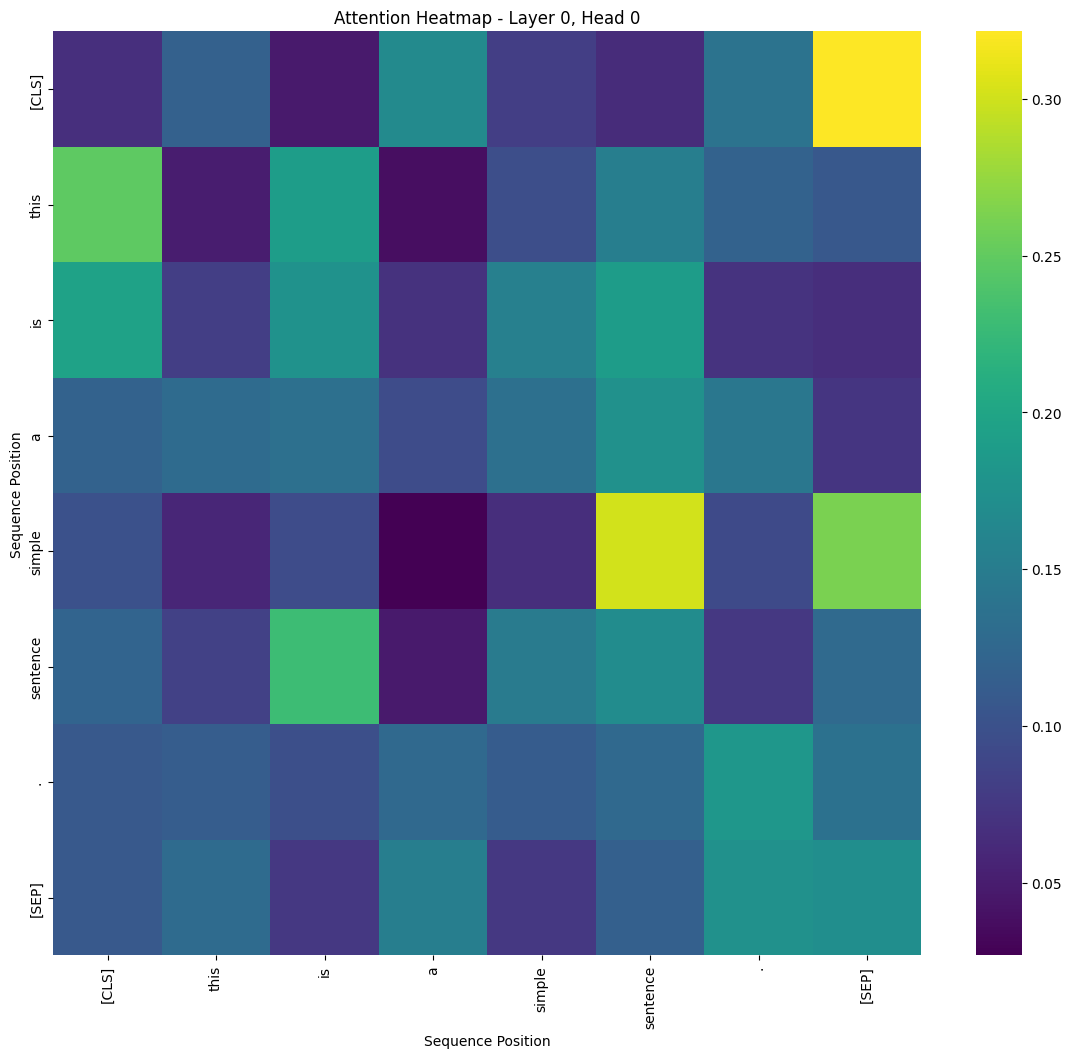

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import AutoTokenizer, AutoModel

def plot_attention_heatmap(model_name, sentence, layer_index, head_index):
    """
    Plots an attention heatmap for a given model, sentence, layer index, and head index.

    Args:
        model_name (str): The name of the model from HuggingFace (e.g., 'bert-base-uncased').
        sentence (str): The input sentence to be tokenized and analyzed.
        layer_index (int): The index of the attention layer to visualize.
        head_index (int): The index of the attention head within the specified layer to visualize.

    Returns:
        None. Displays a heatmap of the attention weights.
    """
    # Load model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name, output_attentions=True)

    # Tokenize the sentence
    tokenized = tokenizer(sentence, return_tensors='pt')

    # Get model output
    with torch.no_grad():
        out = model(**tokenized)

    # Extract attention weights from the specified layer and head
    att = out.attentions
    attention_weights = att[layer_index][0][head_index].detach().numpy()

    # Get the token labels
    tokens = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])

    # Plot heatmap of attention weights
    plt.figure(figsize=(14, 12))
    ax = sns.heatmap(attention_weights, cmap='viridis', xticklabels=tokens, yticklabels=tokens)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f'Attention Heatmap - Layer {layer_index}, Head {head_index}')
    ax.set_xlabel('Sequence Position')
    ax.set_ylabel('Sequence Position')
    plt.show()

# Example usage
plot_attention_heatmap('bert-base-uncased', 'This is a simple sentence.', 0, 0)

